In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as pl
from textblob import TextBlob
from wordcloud import WordCloud
import re
import os

In [7]:
os.chdir('E:\\SENTIMENT_ANALYSIS\\twitter_sentiment_analysis')

In [9]:
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('test_tweets.csv')
print("Test Set:"% test.columns, test.shape, len(test))
#Percentage of Positive/Negative
print("Positive: ", train.label.value_counts()[0]/len(train)*100,"%")
print("Negative: ", train.label.value_counts()[1]/len(train)*100,"%")

Training Set: (31962, 3) 31962
Test Set: (17197, 2) 17197
Positive:  92.98542018647143 %
Negative:  7.014579813528565 %


In [10]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [12]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove @mentions
    text = re.sub(r'#','',text) #Remove the ''#'' symbol
    text = re.sub(r'RT[\s]+','',text) #Remove RT
    text = re.sub(r'https?:\/\/\S+','',text)#Remove the hyperlink
    return text
    

In [13]:
train['tweet'] = train['tweet'].apply(cleanText)

In [14]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation


In [15]:
# Create a funtion subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [16]:
#Create a function polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
#Create columns
train['Subjectivity'] = train['tweet'].apply(getSubjectivity)
train['Polarity'] = train['tweet'].apply(getPolarity)

In [18]:
train.head()

,id,label,tweet,Subjectivity,Polarity
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000
1,2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000
2,3,0,bihday your majesty,0.0,0.000000
3,4,0,model i love u take with u all the time in u...,0.6,0.976562
4,5,0,factsguide: society now motivation,0.0,0.000000


In [ ]:
#plot wordcloud
allwords = ' '.join([twts for twts in train['tweet']])
wordCloud = W



ordCloud(width = 500 , height = 300 , random_state = 21, max_font_size = 119 ).generate(allwords)

In [ ]:
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#Create a function to compute for negative,positive and neutral analysis.
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    


In [20]:
train['Analysis'] = train['Polarity'].apply(getAnalysis)

In [21]:
train.head()

,id,label,tweet,Subjectivity,Polarity,Analysis
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
1,2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
2,3,0,bihday your majesty,0.0,0.000000,Neutral
3,4,0,model i love u take with u all the time in u...,0.6,0.976562,Positive
4,5,0,factsguide: society now motivation,0.0,0.000000,Neutral


In [22]:
#print all of the posiive tweets
j=1
sortedDF = train.sort_values(by =['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j = j+1


1)  thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx.    disapointed getthanked

2)model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

3)[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. allshowandnogo  

4)we won!!! love the land!!! allin cavs champions cleveland clevelandcavaliers  â¦ 

5)   welcome here !  i'm   it's so gr8 ! 

6)i am thankful for having a paner. thankful positive     

7)euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there.  

8)product of the day: happy man wine tool  who's   it's the weekend? time to open up &amp; drink up!

9)beautiful sign by vendor 80 for $45.00!! upsideofflorida shopalyssas   love 

10)  all smiles when media is   !! ðð pressconference in antalya turkey ! sunday throwback  love! ððâ¤ï¸ 

11)we had a great panel on the mediatization of the publi

In [23]:
#print all of the negative tweets
j=1
sortedDF = train.sort_values(by =['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j = j+1


1)  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run

2)the next school year is the year for exams.ð¯ can't think about that ð­ school exams   hate imagine actorslife revolutionschool girl

3) â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   blog silver gold forex

4)we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 

5)sad little dude..   badday coneofshame cats pissed funny laughs 

6)it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday  

7)it's unbelievable that in the 21st century we'd need something like this. again. neverump  xenophobia 

8)yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð 

9)whenever im   and something goes wrong  |  

10)you've really hu my feelings :(  

11)carrying a gun wouldn't of helped if you can'

In [24]:
#print all of the neutral tweets
j=1
sortedDF = train.sort_values(by =['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j)+')'+sortedDF['tweet'][i])
        print()
        j = j+1

1)  bihday your majesty

2) factsguide: society now    motivation

3)  camping tomorrow        dannyâ¦

4)i get to see my daddy today!!   80days gettingfed

5) cnn calls michigan middle school 'build the wall' chant '' tcot  

6)no comment!  in australia   opkillingbay seashepherd helpcovedolphins thecove  helpcovedolphins

7)ouch...junior is angryðgot7 junior yugyoem   omg 

8)retweet if you agree! 

9)its friday! ð smiles all around via ig user:  cookies make people   

10)as we all know, essential oils are not made of chemicals. 

11)  lumpy says i am a . prove it lumpy.

12)  tgif   ff to my gamedev indiedev indiegamedev squad!     

13)  alohafriday time does not exist positivevibes hawaiian     

14)  rip to the fellow nohern ireland fan who sadley passed away tonight!.. gawa, forever singing and cheering on fire  

15)morning~~ travelingram dalat   ripinkylife 

16)oh, cedarpoint. waited 2 hours in the valravn line and it stopped working. we were so close.  

17)when you 

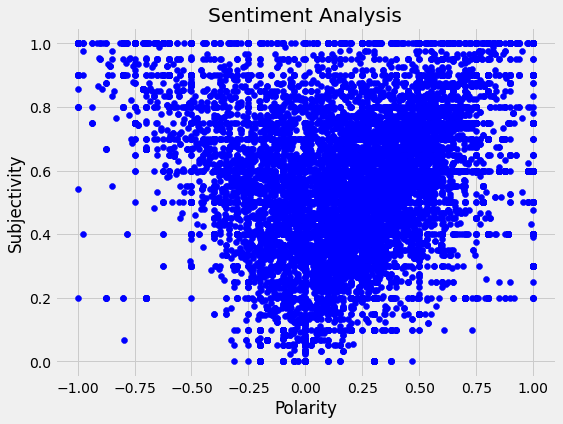

In [25]:
#plot the polarity and negativity
plt.figure(figsize=(8,6))
for i in range(0,train.shape[0]):
    plt.scatter(train['Polarity'][i],train['Subjectivity'][i],color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# Percentage of positive tweets
ptweet = train[train['Analysis'] == 'Positive']
ptweet = ptweet['tweet']
ptweet

In [ ]:
round((ptweet.shape[0]/train.shape[0] )* 100 ,1)

In [ ]:
# Percentage of egative tweets
ntweet = train[train['Analysis'] == 'Negative']
ntweet = ptweet['tweet']
ntweet

In [ ]:
round((ntweet.shape[0]/train.shape[0] )* 100 ,1)

In [ ]:
# Show the value counts
train['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
train['Analysis'].value_counts().plot(kind = 'bar')
plt.show()